<a href="https://colab.research.google.com/github/agbleze/ncfile_util/blob/main/ncfile_util.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!cd drive

In [3]:
cd /content/drive/MyDrive/Environment Europe

/content/drive/MyDrive/Environment Europe


In [4]:
!pip install netCDF4
!pip install s3fs
!pip install rasterio rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.3/76.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 27.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.6.0
    Uninstalling fsspec-2023.6.0:
      Successfully uninstalled fsspec-2023.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.2.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64",

In [2]:
import netCDF4
import numpy as np
from osgeo import gdal,osr,ogr
import matplotlib.pyplot as plt
import s3fs
import os
import netCDF4
import matplotlib.pyplot as plt
import xarray as xr
import rasterio
import rioxarray
import geopandas as gpd
from shapely.geometry import mapping
import rioxarray as rio

ModuleNotFoundError: No module named 'netCDF4'

In [ ]:
path = "/content/drive/MyDrive/Environment Europe/CLIMATE-20240310T121935Z-001/CLIMATE/pr_SEA-22_MOHC-HadGEM2-ES_rcp26_r1i1p1_GERICS-REMO2015_v1_day_20910101-20951230.nc"

In [ ]:
f = netCDF4.Dataset(path,'r')

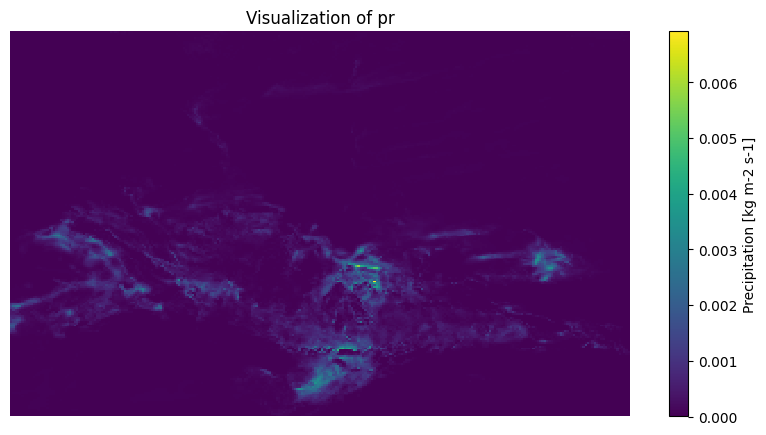

In [ ]:
ds = xr.open_dataset(path)
fig, ax = plt.subplots(figsize=(10, 5))
ds["pr"][0].plot(ax=ax)
ax.set(title=f"Visualization of pr")
ax.set_axis_off()
plt.show()

In [ ]:
ds.coords["lon"]

<xarray.DataArray 'lon' (rlat: 201, rlon: 273)>
[54873 values with dtype=float32]
Coordinates:
  * rlat     (rlat) float64 -16.06 -15.84 -15.62 -15.4 ... 27.5 27.72 27.94
  * rlon     (rlon) float64 88.16 88.38 88.6 88.82 ... 147.3 147.6 147.8 148.0
    lat      (rlat, rlon) float32 ...
    lon      (rlat, rlon) float32 ...
Attributes:
    standard_name:  longitude
    long_name:      longitude coordinate
    units:          degrees_east
    bounds:         lon_vertices

In [ ]:
ds.dims

Frozen({'time': 1800, 'bnds': 2, 'rlat': 201, 'rlon': 273, 'vertices': 4})

In [ ]:
ds.rio.set_spatial_dims("rlon", "rlat")

<xarray.Dataset>
Dimensions:                     (time: 1800, bnds: 2, rlat: 201, rlon: 273,
                                 vertices: 4)
Coordinates:
  * time                        (time) object 2091-01-01 12:00:00 ... 2095-12...
  * rlat                        (rlat) float64 -16.06 -15.84 ... 27.72 27.94
  * rlon                        (rlon) float64 88.16 88.38 88.6 ... 147.8 148.0
    lat                         (rlat, rlon) float32 ...
    lon                         (rlat, rlon) float32 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds                   (time, bnds) object ...
    rotated_latitude_longitude  int32 ...
    lat_vertices                (rlat, rlon, vertices) float32 ...
    lon_vertices                (rlat, rlon, vertices) float32 ...
    pr                          (time, rlat, rlon) float32 ...
Attributes: (12/35)
    institution:                    Helmholtz-Zentrum Geesthacht, Climate Ser...
    institute_id:                   GERICS
    experiment_id:                  rcp26
    source:                         GERICS-REMO2015
    model_id:                       GERICS-REMO2015
    forcing:                        N/A
    ...                             ...
    modeling_realm:                 atmos
    realization:                    1
    cmor_version:                   2.9.1
    creation_date:                  2019-04-04-T17:29:02Z
    tracking_id:                    hdl:21.14103/b182d858-b35b-4b21-9d46-3757...
    c3s_disclaimer:                 This data has been curated and prepared i...

In [ ]:
ds["pr"]

<xarray.DataArray 'pr' (time: 1800, rlat: 201, rlon: 273)>
[98771400 values with dtype=float32]
Coordinates:
  * time     (time) object 2091-01-01 12:00:00 ... 2095-12-30 12:00:00
  * rlat     (rlat) float64 -16.06 -15.84 -15.62 -15.4 ... 27.5 27.72 27.94
  * rlon     (rlon) float64 88.16 88.38 88.6 88.82 ... 147.3 147.6 147.8 148.0
    lat      (rlat, rlon) float32 ...
    lon      (rlat, rlon) float32 ...
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation
    comment:           at surface; includes both liquid and solid phases from...
    units:             kg m-2 s-1
    original_name:     pr
    original_units:    kg m-2 h-1
    history:           2019-04-04T17:29:02Z altered by CMOR: Converted units ...
    cell_methods:      time: mean
    associated_files:  gridspecFile: gridspec_atmos_fx_GERICS-REMO2015_rcp26_...
    grid_mapping:      rotated_latitude_longitude

In [ ]:
ds["pr"].coords["time"]

<xarray.DataArray 'time' (time: 1800)>
array([cftime.Datetime360Day(2091, 1, 1, 12, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2091, 1, 2, 12, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2091, 1, 3, 12, 0, 0, 0, has_year_zero=True), ...,
       cftime.Datetime360Day(2095, 12, 28, 12, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2095, 12, 29, 12, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2095, 12, 30, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2091-01-01 12:00:00 ... 2095-12-30 12:00:00
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

In [ ]:
type(ds["pr"].coords["time"])

xarray.core.dataarray.DataArray

In [ ]:
## indicates the precipitation data is daily from 2091-01-01 12:00:00
# show first 10 time data
for tim_index, _time in enumerate(ds["pr"].coords["time"]):
  if tim_index > 10:
    break
  print(_time.data)

2091-01-01 12:00:00
2091-01-02 12:00:00
2091-01-03 12:00:00
2091-01-04 12:00:00
2091-01-05 12:00:00
2091-01-06 12:00:00
2091-01-07 12:00:00
2091-01-08 12:00:00
2091-01-09 12:00:00
2091-01-10 12:00:00
2091-01-11 12:00:00


In [ ]:
start_date = sorted(ds["pr"].coords["time"].data)[0]
last_date = sorted(ds["pr"].coords["time"].data)[-1]

print(f"Precipitation data starts from {start_date} to {last_date}")

Precipitation data starts from 2091-01-01 12:00:00 to 2095-12-30 12:00:00


In [ ]:
preci = ds["pr"]

In [ ]:
print(preci.rio.crs)

None


In [ ]:
preci = preci.rio.set_spatial_dims("rlon", "rlat")

In [ ]:
preci.rio.set_crs("epsg:4326")

<xarray.DataArray 'pr' (time: 1800, rlat: 201, rlon: 273)>
[98771400 values with dtype=float32]
Coordinates:
  * time     (time) object 2091-01-01 12:00:00 ... 2095-12-30 12:00:00
  * rlat     (rlat) float64 -16.06 -15.84 -15.62 -15.4 ... 27.5 27.72 27.94
  * rlon     (rlon) float64 88.16 88.38 88.6 88.82 ... 147.3 147.6 147.8 148.0
    lat      (rlat, rlon) float32 ...
    lon      (rlat, rlon) float32 ...
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation
    comment:           at surface; includes both liquid and solid phases from...
    units:             kg m-2 s-1
    original_name:     pr
    original_units:    kg m-2 h-1
    history:           2019-04-04T17:29:02Z altered by CMOR: Converted units ...
    cell_methods:      time: mean
    associated_files:  gridspecFile: gridspec_atmos_fx_GERICS-REMO2015_rcp26_...
    grid_mapping:      rotated_latitude_longitude

In [ ]:
preci.rio.to_raster("preci.tif")

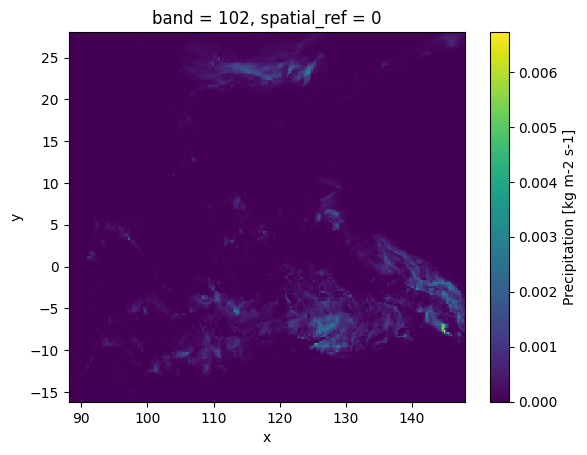

In [ ]:

preci_geotif_path = "/content/drive/MyDrive/Environment Europe/preci.tif"
geo_preci = rio.open_rasterio(preci_geotif_path)
geo_preci[101].plot() #getting the first band

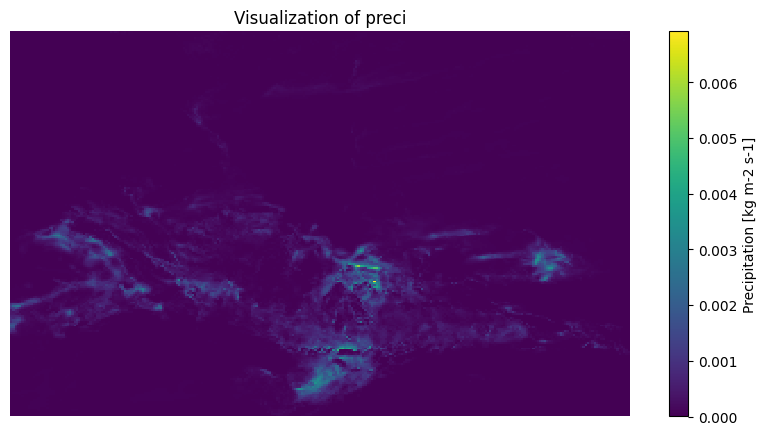

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
preci[0].plot(ax=ax)
ax.set(title="Visualization of preci")
ax.set_axis_off()
plt.show()

In [ ]:
papua_newg = gpd.read_file('/content/drive/MyDrive/Environment Europe/png_adm_nso_20190508_shp/png_admbnda_adm0_nso_20190508.shp')
papua_newg

,Shape_Leng,Shape_Area,ADM0_EN,ADM0_PCODE,ADM0_REF,ADM0ALT1EN,ADM0ALT2EN,date,validOn,validTo,geometry
0,203.703028,37.781489,Papua New Guinea,PG,None,None,None,2015-02-24,2019-05-08,None,"MULTIPOLYGON (((153.16666 -11.46486, 153.16586..."


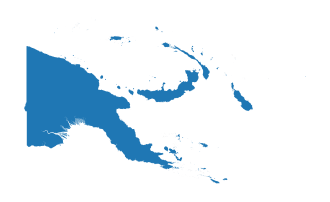

In [ ]:
# If desired, select geometry subset by editing the field (ie.'NAME') and value (ie.'Florida')
#state_border = us_state_borders[us_state_borders['NAME'] == 'Florida']

# Visualize selected geometry
f, ax = plt.subplots(1, figsize=(4, 4))
ax = papua_newg.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [ ]:
goesR_crs = papua_newg.crs

In [ ]:
reproj_papua_shp = papua_newg.to_crs("epsg:4326")

In [ ]:
reproj_papua_shp

,Shape_Leng,Shape_Area,ADM0_EN,ADM0_PCODE,ADM0_REF,ADM0ALT1EN,ADM0ALT2EN,date,validOn,validTo,geometry
0,203.703028,37.781489,Papua New Guinea,PG,None,None,None,2015-02-24,2019-05-08,None,"MULTIPOLYGON (((153.16666 -11.46486, 153.16586..."


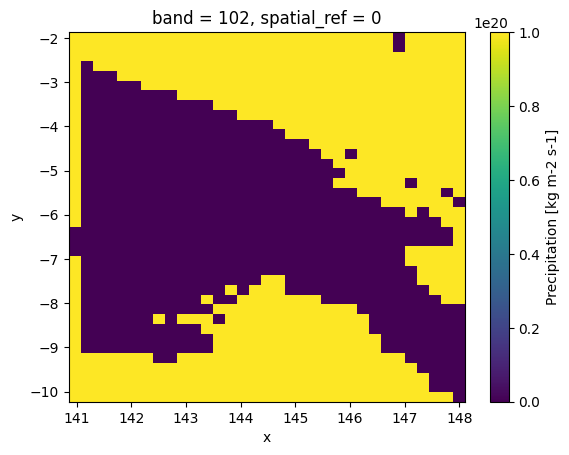

In [ ]:
reproj_preci_clipped = preci.rio.clip(reproj_papua_shp.geometry.apply(mapping))
reproj_preci_clipped.rio.to_raster("reproj_preci_papua_new_guinea.tif")
reproj_papua_preci_geotif_path = "/content/drive/MyDrive/Environment Europe/reproj_preci_papua_new_guinea.tif"
reproj_papua_geo_preci = rio.open_rasterio(reproj_papua_preci_geotif_path)
reproj_papua_geo_preci[101].plot() #getting the first band


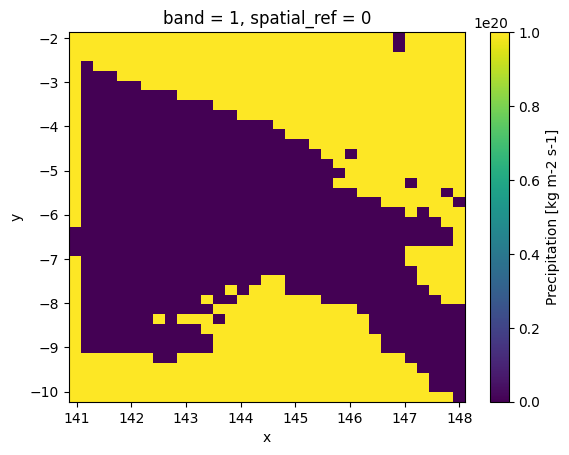

In [ ]:
reproj_papua_geo_preci[0].plot()

In [ ]:
preci_clipped = preci.rio.clip(papua_newg.geometry.apply(mapping))

In [ ]:
preci_clipped.rio.to_raster("precipitation_papua_new_guinea.tif")

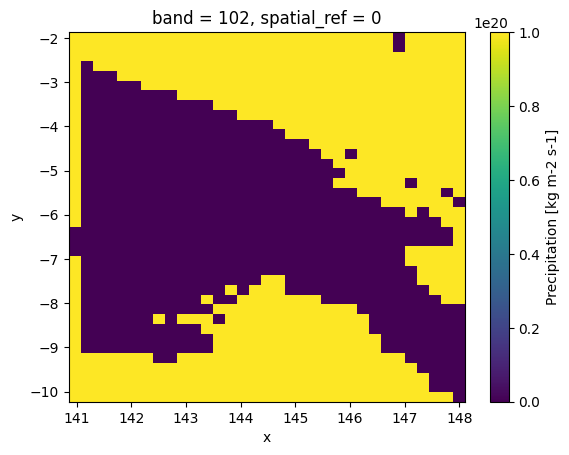

In [ ]:
papua_preci_geotif_path = "/content/drive/MyDrive/Environment Europe/precipitation_papua_new_guinea.tif"
papua_geo_preci = rio.open_rasterio(papua_preci_geotif_path)
papua_geo_preci[101].plot() #getting the first band

In [9]:

# class for plotting data
import netCDF4
import numpy as np
from osgeo import gdal,osr,ogr
import matplotlib.pyplot as plt
import s3fs
import netCDF4
import matplotlib.pyplot as plt
import xarray as xr
import rasterio
import rioxarray
import geopandas as gpd
from shapely.geometry import mapping
import rioxarray as rio
from pathlib import Path
from typing import Union, NamedTuple
import os

class NcFileUtil(object):
  def __init__(self, file_path: Union[str, Path],
               clip_shapefile_path: Union[str, Path],
               output_dir: str,
               output_filename: str,
               variable_to_use: str = "pr",
               x_dim: str = "rlon", y_dim: str = "rlat",
               projection_crs: str = "epsg:4326",
               date_to_plot: str = "2091-01-01 12:00:00",
               ):
    self.file_path = file_path
    self.clip_shapefile_path = clip_shapefile_path
    self.output_dir = output_dir
    self.output_filename = output_filename
    self.variable_to_use = variable_to_use
    self.x_dim = x_dim
    self.y_dim = y_dim
    self.projection_crs = projection_crs
    self.date_to_plot = date_to_plot

  def preprocess_data(self, x_dim: Union[None, str]=None,
                      y_dim: Union[None, str]=None,
                      projection_crs: Union[None, str]=None,
                      file_path = None,
                      ):

    if not x_dim:
      x_dim = self.x_dim

    if not y_dim:
      y_dim = self.y_dim

    if not projection_crs:
      projection_crs = self.projection_crs

    if not file_path:
      file_path = self.file_path

    self.data = xr.open_dataset(file_path)
    self.data.rio.set_spatial_dims(x_dim, y_dim)
    self.data.rio.set_crs(projection_crs)
    return self.data

  def read_shapefile(self, clip_shapefile_path=None, projection_crs = None):
    if not projection_crs:
      projection_crs = self.projection_crs

    if not clip_shapefile_path:
      clip_shapefile_path = self.clip_shapefile_path

    shapefile = gpd.read_file(clip_shapefile_path)
    self.reproj_shapefile = shapefile.to_crs(projection_crs)
    return self.reproj_shapefile

  def get_data_start_end_time(self) -> list:

    if not hasattr(self, "data"):
      self.data = self.preprocess_data()

    start_date = sorted(self.data[self.variable_to_use].coords["time"].data)[0]
    end_date = sorted(self.data[self.variable_to_use].coords["time"].data)[-1]
    print(f"Data for {self.variable_to_use} starts from {start_date} to {last_date}")

    return [start_date, end_date]

  def crop_and_export_as_geotiff(self, variable_for_export=None,
                                shapefile_for_cropping=None,
                                 output_dir=None,
                                 output_filename=None,
                                 projection_crs=None
                                 ):
    if not variable_for_export:
      variable_for_export = self.variable_to_use

    if not shapefile_for_cropping:
      if not hasattr(self, "reproj_shapefile"):
        self.reproj_shapefile = self.read_shapefile()
      shapefile_for_cropping = self.reproj_shapefile

    if not output_dir:
      output_dir = self.output_dir
    if not output_filename:
      output_filename = self.output_filename

    if not projection_crs:
      projection_crs = self.projection_crs

    self.output_filepath = Path(os.path.join(output_dir, output_filename))

    if not os.path.exists(output_dir):
      os.makedirs(output_dir)

    if not hasattr(self, "data"):
      self.data = self.preprocess_data()

    self.var_data = self.data[variable_for_export].rio.set_crs(projection_crs)
    self.cropped_var_data = self.var_data.rio.clip(shapefile_for_cropping.geometry.apply(mapping))
    self.cropped_var_data.rio.to_raster(self.output_filepath)

  def plot_map(self, geotif_to_plot=None, date_to_plot=None):

    if not hasattr(self, "date_band_index_map"):
      self.date_band_index_map = self.date_band_index_map

    if not date_to_plot:
      date_to_plot = self.date_to_plot

    if not geotif_to_plot:
      if not hasattr(self, "cropped_var_data"):
        self.crop_and_export_as_geotiff()
        geotif_to_plot = self.cropped_var_data
      else:
        geotif_to_plot = self.cropped_var_data


    date_index_map = self.date_band_index_map
    band_to_plot = date_index_map.get(date_to_plot)
    data_to_plot = geotif_to_plot[band_to_plot]

    fig, ax = plt.subplots(figsize=(10, 5))
    data_to_plot.plot(ax=ax)
    ax.set(title=f"Visualization of {self.variable_to_use} for {date_to_plot}")
    ax.set_axis_off()
    plt.show()

  @property
  def date_band_index_map(self) -> dict:
    if not hasattr(self, "var_data"):
      self.crop_and_export_as_geotiff()
    data = self.var_data

    date_dict = {}
    for time_index, _time in enumerate(data.coords["time"]):
      date_dict[f"{_time.data}"] = time_index

    return date_dict










In [20]:
filepath = Path("/content/drive/MyDrive/Environment Europe/CLIMATE-20240310T121935Z-001/CLIMATE/pr_SEA-22_MOHC-HadGEM2-ES_rcp26_r1i1p1_GERICS-REMO2015_v1_day_20910101-20951230.nc")
clip_shapefile_path = Path("/content/drive/MyDrive/Environment Europe/png_adm_nso_20190508_shp/png_admbnda_adm0_nso_20190508.shp")
output_dir = Path("/content/drive/MyDrive/Environment Europe/results/")
output_filename = "precipitation_papua_rcp26.tif"
date_to_plot = "2091-01-01 12:00:00"
variable_to_use = "pr"



#filepath_8_5 = Path()


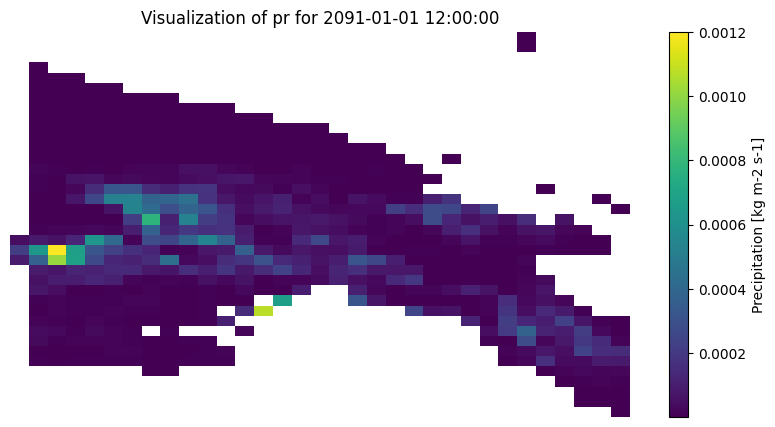

In [21]:

ncfile_util = NcFileUtil(file_path=filepath, clip_shapefile_path=clip_shapefile_path,
                         output_dir=output_dir,
                         output_filename=output_filename,
                         variable_to_use=variable_to_use,
                         x_dim="rlon", y_dim="rlat",
                         date_to_plot=date_to_plot,
                         ).plot_map()

In [40]:
date_index = ncfile_util.date_band_index_map

In [ ]:
date_index.keys()

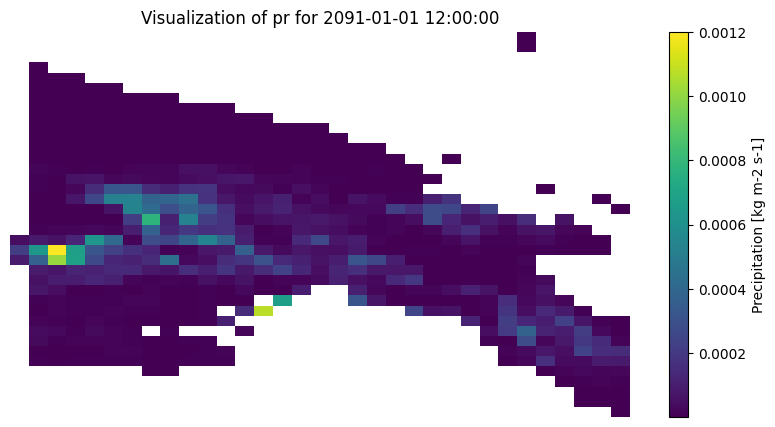

In [48]:
ncfile_util.plot_map()

In [ ]:

    preci.rio.set_crs("epsg:4326")
    preci.rio.to_raster("preci.tif")
    preci_geotif_path = "/content/drive/MyDrive/Environment Europe/preci.tif"
    geo_preci = rio.open_rasterio(preci_geotif_path)
    geo_preci[101].plot()


    fig, ax = plt.subplots(figsize=(10, 5))
    preci[0].plot(ax=ax)
    ax.set(title="Visualization of preci")
    ax.set_axis_off()
    plt.show()

    papua_newg = gpd.read_file('/content/drive/MyDrive/Environment Europe/png_adm_nso_20190508_shp/png_admbnda_adm0_nso_20190508.shp')
    papua_newg

    f, ax = plt.subplots(1, figsize=(4, 4))
    ax = papua_newg.plot(ax=ax)
    ax.set_axis_off()
    plt.show()

    reproj_papua_shp = papua_newg.to_crs("epsg:4326")

    reproj_preci_clipped = preci.rio.clip(reproj_papua_shp.geometry.apply(mapping))
    reproj_preci_clipped.rio.to_raster("reproj_preci_papua_new_guinea.tif")
    reproj_papua_preci_geotif_path = "/content/drive/MyDrive/Environment Europe/reproj_preci_papua_new_guinea.tif"
    reproj_papua_geo_preci = rio.open_rasterio(reproj_papua_preci_geotif_path)
    reproj_papua_geo_preci[101].plot()


NetCDF to GeoTIFF using Python  

https://pratiman-91.github.io/2020/08/01/NetCDF-to-GeoTIFF-using-Python.html

In [ ]:
import xarray as xr
import rioxarray as rio

#Open the NetCDF
#Download the sample from https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.nc


In [ ]:
!wget --continue https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.nc


--2024-03-31 10:49:53--  https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.nc
Resolving www.unidata.ucar.edu (www.unidata.ucar.edu)... 128.117.149.20
Connecting to www.unidata.ucar.edu (www.unidata.ucar.edu)|128.117.149.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2767916 (2.6M) [application/x-netcdf]
Saving to: ‘sresa1b_ncar_ccsm3-example.nc’

sresa1b_ncar_ccsm3- 100%[===================>]   2.64M  1.21MB/s    in 2.2s    

2024-03-31 10:49:56 (1.21 MB/s) - ‘sresa1b_ncar_ccsm3-example.nc’ saved [2767916/2767916]



In [ ]:
!ls

 CLIMATE-20240310T121935Z-001	       png_adm_nso_20190508_shp
 CLIMATE-20240310T121935Z-001.zip      sresa1b_ncar_ccsm3-example.nc
'Environment Europe Foundation.docx'


In [ ]:
ncfile = xr.open_dataset('sresa1b_ncar_ccsm3-example.nc')

#Extract the variable
pr = ncfile['pr']

#(Optional) convert longitude from (0-360) to (-180 to 180) (if required)
#pr.coords['lon'] = (pr.coords['lon'] + 180) % 360 - 180
#pr = pr.sortby(pr.lon)

#Define lat/long
#pr = pr.rio.set_spatial_dims('lon', 'lat')

#Check for the CRS
#pr.rio.crs

#(Optional) If your CRS is not discovered, you should be able to add it like so:
#pr.rio.set_crs("epsg:4326")

#Saving the file
#pr.rio.to_raster(r"GeoTIFF.tif")


In [ ]:
ncfile

<xarray.Dataset>
Dimensions:    (lat: 128, lon: 256, bnds: 2, plev: 17, time: 1)
Coordinates:
  * lat        (lat) float32 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float32 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 3e+03 2e+03 1e+03
  * time       (time) object 2000-05-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    area       (lat, lon) float32 ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    msk_rgn    (lat, lon) int32 ...
    pr         (time, lat, lon) float32 ...
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object ...
    ua         (time, plev, lat, lon) float32 ...
Attributes: (12/18)
    CVS_Id:              $Id$
    creation_date:       
    prg_ID:              Source file unknown Version unknown Date unknown
    cmd_ln:              bds -x 256 -y 128 -m 23 -o /data/zender/data/dst_T85.nc
    history:             Tue Oct 25 15:08:51 2005: ncks -O -x -v va -m sresa1...
    table_id:            Table A1
    ...                  ...
    references:          Collins, W.D., et al., 2005:\n The Community Climate...
    acknowledgment:       Any use of CCSM data should acknowledge the contrib...
    realization:         1
    experiment_id:       720 ppm stabilization experiment (SRESA1B)
    comment:             This simulation was initiated from year 2000 of \n C...
    model_name_english:  NCAR CCSM

In [ ]:
ncfile.rio.crs
pr_examp = ncfile['pr']
pr_examp.rio.crs


In [ ]:
pr.rio.crs

CRS.from_epsg(4326)

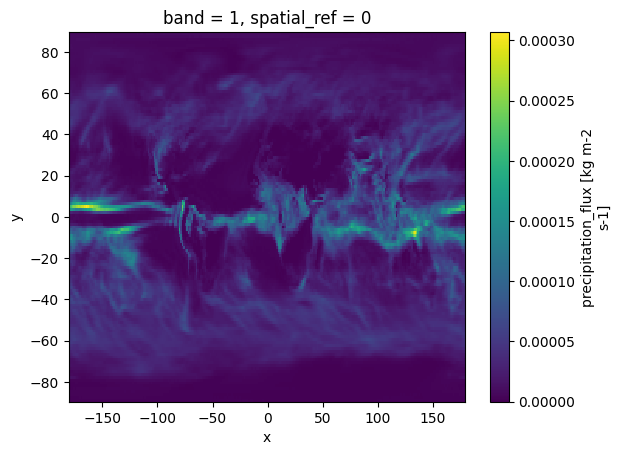

In [ ]:
import xarray as xr
geotif_path = "/content/drive/MyDrive/Environment Europe/GeoTIFF.tif"
dem = rio.open_rasterio(geotif_path)
dem[0].plot() #getting the first band


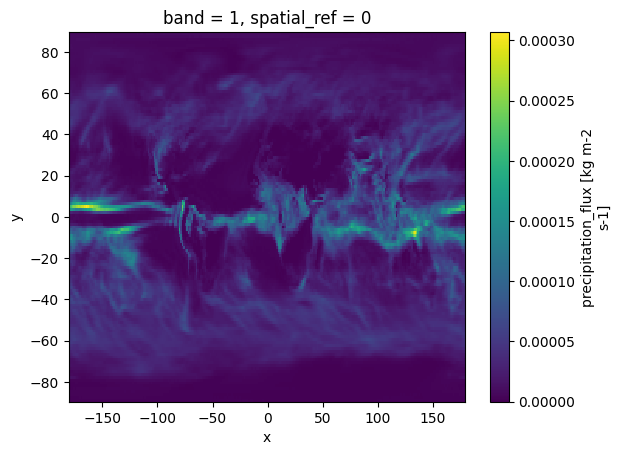

In [ ]:
dem.plot()

In [ ]:
xr_data = xr.open_dataset(geotif_path, engine="rasterio")

In [ ]:
xr_data.variables

Frozen({'band': <xarray.IndexVariable 'band' (band: 1)>
array([1]), 'x': <xarray.IndexVariable 'x' (x: 256)>
array([-180.     , -178.59375, -177.1875 , ...,  175.78125,  177.1875 ,
        178.59375]), 'y': <xarray.IndexVariable 'y' (y: 128)>
array([-88.927734, -87.527298, -86.126861, -84.726424, -83.325987, -81.925551,
       -80.525114, -79.124677, -77.72424 , -76.323804, -74.923367, -73.52293 ,
       -72.122493, -70.722056, -69.32162 , -67.921183, -66.520746, -65.120309,
       -63.719873, -62.319436, -60.918999, -59.518562, -58.118126, -56.717689,
       -55.317252, -53.916815, -52.516379, -51.115942, -49.715505, -48.315068,
       -46.914632, -45.514195, -44.113758, -42.713321, -41.312884, -39.912448,
       -38.512011, -37.111574, -35.711137, -34.310701, -32.910264, -31.509827,
       -30.10939 , -28.708954, -27.308517, -25.90808 , -24.507643, -23.107207,
       -21.70677 , -20.306333, -18.905896, -17.50546 , -16.105023, -14.704586,
       -13.304149, -11.903712, -10.503276,  -9

In [ ]:
xr_data.keys()

KeysView(<xarray.Dataset>
Dimensions:      (band: 1, x: 256, y: 128)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -178.6 -177.2 -175.8 ... 175.8 177.2 178.6
  * y            (y) float64 -88.93 -87.53 -86.13 -84.73 ... 86.13 87.53 88.93
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...)